# TCC 
Aluno: Geraldo Augusto de Morais Figueiredo

## O USO DE DADOS DE VARIAÇÃO DE MOBILIDADE URBANA NA PREVISÃO DE NÚMEROS DE CASOS DE COVID-19 


### Entendimento do problema
#### É possível prever aumento ou diminiução de número de casos confirmados de Covid a partir dos dados de mobilidade e média móvel de 14 dias de número de casos confirmados de um município?

Nesse trabalho espera-se que, a partir dos dados de mobilidade de municípios do Brasis, possa ser possível prever aumento ou diminuição de número de casos de Covid-19. 

Os dados de mobilidade são obtidos nos datasets do [Relatórios de mobilidade da comunidade do Goolge](https://www.google.com/covid19/mobility/). Nele são mostrados a variação percentual de mobilidade ao esperado pela médias que o dataset tem.

Já os dados de notificações de casos de Covid-19 são do [Ministério da Saúde](https://dados.gov.br/dataset/casos-nacionais).

Nesse trabalho, o corte feito foi do Brasília-DF, Belo Horizonte-BH, Porto Alegre-RS, Manaus-AM e Salvador-BA e foi utilizado a informação de variação da mobilidade de transporte público, locais de trabalho e locais residênciais.


### Importação das bibliotecas necessárias

In [1]:
#carregamento das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm # 0.9.0
import statsmodels.formula.api as smf # 0.9.0
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from datetime import datetime, timedelta

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

### Importação das bases
As bases foram obtidas nos seguintes links<br>
- [dados-mg-1](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-mg-1.csv) <br>
- [dados-mg-2](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-mg-2.csv)<br>
- [dados-mg-3](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-mg-3.csv)<br>
- [dados-mg-4](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-mg-4.csv)<br>
- [dados-df](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-df.csv)<br>
- [dados-rs-1](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-rs-1.csv) <br>
- [dados-rs-2](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-rs-2.csv)<br>
- [dados-rs-3](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-rs-3.csv)<br>
- [dados-rs-4](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-rs-4.csv)<br>
- [dados-am](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-am.csv)<br>
- [dados-ba-1](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ba-1.csv) <br>
- [dados-ba-2](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ba-2.csv)<br>
- [dados-ba-3](https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ba-3.csv)<br>

Foi selecionado o período de 19/02/2020 até 30/06/2021 das notificações de Covid-19<br>
O dado de mobilidade selecionado foi a variação percentual de mobilidade das estações de tranporte público

## Carregar notificações de Covid-19 de Belo Horizonte

In [2]:
notificMG1 = pd.read_csv("dados/dados-mg-1.csv",sep=";",encoding=("latin_1")) 
notificMG1 = notificMG1[notificMG1.municipioNotificacao == "Belo Horizonte"]
notificMG1.shape

(176550, 29)

In [3]:
notificMG2 = pd.read_csv("dados/dados-mg-2.csv",sep=";",encoding=("latin_1")) 
notificMG2 = notificMG2[notificMG2.municipioNotificacao == "Belo Horizonte"]
notificMG2.shape

(185369, 29)

In [4]:
notificMG3 = pd.read_csv("dados/dados-mg-3.csv",sep=";",encoding=("latin_1")) 
notificMG3 = notificMG3[notificMG3.municipioNotificacao == "Belo Horizonte"]
notificMG3.shape

(243149, 29)

In [5]:
notificMG4 = pd.read_csv("dados/dados-mg-4.csv",sep=";",encoding=("latin_1")) 
notificMG4 = notificMG4[notificMG4.municipioNotificacao == "Belo Horizonte"]
notificMG4.shape

(192501, 29)

In [6]:
notificMG = pd.concat([notificMG1, notificMG2,notificMG3,notificMG4], ignore_index=True)
del notificMG1, notificMG2,notificMG3,notificMG4
notificMG.shape

(797569, 29)

In [7]:
notificMG.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,P9dNE0d8a3,2020-08-07T03:00:21.957Z,2020-08-04T03:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,undefined,6.0,NaN,NaN,NaN
1,PvSnJsvC4F,2020-08-07T03:00:09.028Z,2020-08-06T03:00:00.000Z,undefined,Outros,Não,NaN,NaN,Concluído,2020-08-06T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,undefined,Masculino,MINAS GERAIS,31.0,Itatiaiuçu,3.13e+06,undefined,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,undefined,55.0,NaN,NaN,NaN
2,zZ2wD8s1Kc,2020-08-07T03:00:03.017Z,2020-07-02T03:00:00.000Z,undefined,"Dor de Garganta, Febre, Dispneia, Tosse, Outros",Não,NaN,NaN,Exame Não Solicitado,NaN,NaN,NaN,undefined,Feminino,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,undefined,40.0,NaN,NaN,NaN
3,Y5x6EnPa7B,2020-08-07T03:00:48.047Z,2020-08-04T03:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,undefined,27.0,NaN,NaN,NaN
4,DhkquR49H5,2020-08-07T03:00:08.570Z,2020-08-06T03:00:00.000Z,undefined,Outros,Não,NaN,NaN,Concluído,2020-08-06T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Negativo,undefined,Masculino,MINAS GERAIS,31.0,Itatiaiuçu,3.13e+06,undefined,MINAS GERAIS,31.0,Belo Horizonte,3.11e+06,undefined,undefined,24.0,NaN,NaN,NaN


## Carregar notificações de Covid-19 de Brasília

In [8]:
#%% carregamento das notificações do DF de casos de Covid
notificDF = pd.read_csv("dados/dados-df.csv",sep=";",encoding=("latin_1")) 
notificDF = notificDF[notificDF.municipioNotificacao == "Brasília"]
#notificDF = dadosCovidTotal.iloc[:,1:dadosCovidTotal.shape[1]]
notificDF.shape

(637597, 29)

## Carregar notificações de Covid-19 de Porto Alegre

In [9]:
notificRS1 = pd.read_csv("dados/dados-rs-1.csv",sep=";",encoding=("latin_1")) 
notificRS1 = notificRS1[notificRS1.municipioNotificacao == "Porto Alegre"]
notificRS1.shape

(81821, 29)

In [10]:
notificRS2 = pd.read_csv("dados/dados-rs-2.csv",sep=";",encoding=("latin_1")) 
notificRS2 = notificRS2[notificRS2.municipioNotificacao == "Porto Alegre"]
notificRS2.shape

(215852, 29)

In [11]:
notificRS3 = pd.read_csv("dados/dados-rs-3.csv",sep=";",encoding=("latin_1")) 
notificRS3 = notificRS3[notificRS3.municipioNotificacao == "Porto Alegre"]
notificRS3.shape

(172370, 29)

In [12]:
notificRS4 = pd.read_csv("dados/dados-rs-4.csv",sep=";",encoding=("latin_1")) 
notificRS4 = notificRS4[notificRS4.municipioNotificacao == "Porto Alegre"]
notificRS4.shape

(135854, 29)

In [13]:
notificPOA = pd.concat([notificRS1, notificRS2,notificRS3,notificRS4], ignore_index=True)
del notificRS1, notificRS2,notificRS3,notificRS4
notificPOA.shape

(605897, 29)

## Carregar notificações de Covid-19 de Manaus

In [14]:
notificMAN = pd.read_csv("dados/dados-am.csv",sep=";",encoding=("latin_1")) 
notificMAN = notificMAN[notificMAN.municipioNotificacao == "Manaus"]
notificMAN.shape


(539959, 29)

## Carregar notificações de Covid-19 de Salvador-BA

In [15]:
notificBA1 = pd.read_csv("dados/dados-ba-1.csv",sep=";",encoding=("latin_1")) 
notificBA1 = notificBA1[notificBA1.municipioNotificacao == "Salvador"]
notificBA1.shape

(258985, 29)

In [16]:
notificBA2 = pd.read_csv("dados/dados-ba-2.csv",sep=";",encoding=("latin_1")) 
notificBA2 = notificBA2[notificBA2.municipioNotificacao == "Salvador"]
notificBA2.shape

(253747, 29)

In [17]:
notificBA3 = pd.read_csv("dados/dados-ba-3.csv",sep=";",encoding=("latin_1")) 
notificBA3= notificBA3[notificBA3.municipioNotificacao == "Salvador"]
notificBA3.shape

(224287, 29)

In [18]:
notificSSA = pd.concat([notificBA1, notificBA2,notificBA3], ignore_index=True)
notificSSA.shape
del notificBA1, notificBA2,notificBA3

### Concatenar notificações de cidades

In [19]:
dadosCovidTotal = pd.concat([notificDF,notificMG,notificPOA,notificMAN,notificSSA])
dadosCovidTotal.shape

(3318041, 29)

In [20]:
dadosCovidTotal.groupby(['municipioNotificacao']).size()

municipioNotificacao
Belo Horizonte    797569
Brasília          637597
Manaus            539959
Porto Alegre      605897
Salvador          737019
dtype: int64

<AxesSubplot:title={'center':'Quantidade de notificações de COVID-19 por município de notificação'}, xlabel='Cidades', ylabel='Qtd Notificações'>

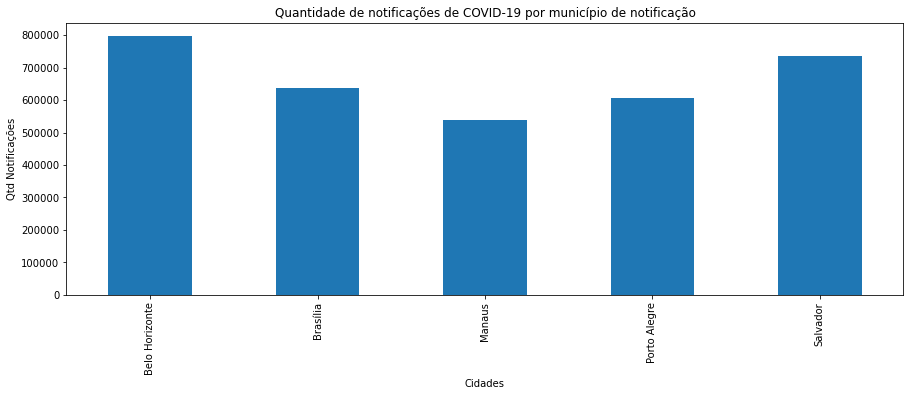

In [21]:
dadosCovidTotal.groupby(['municipioNotificacao']).municipioNotificacao.count().plot(
    kind='bar',title='Quantidade de notificações de COVID-19 por município de notificação',
    xlabel = "Cidades", ylabel = "Qtd Notificações", figsize=(15,5))

In [22]:
del notificDF,notificMG,notificPOA,notificMAN,notificSSA

## Recorte temporal de notificações
Data de início de sintomas de 31/03/2020 ate 30/06/2021

In [23]:
#corte na base de 01/04/2020 ate 30/06/2021
dadosCovidTotal['dataInicioSintomas'] = pd.to_datetime(dadosCovidTotal['dataInicioSintomas'],utc=True).dt.floor('d') 
dadosCovidTotalInicial = dadosCovidTotal.loc[(dadosCovidTotal.dataInicioSintomas > '2020-03-31') & (dadosCovidTotal.dataInicioSintomas < '2021-07-01')]
dadosCovidTotalInicial.shape

(3261781, 29)

In [24]:
dadosCovidTotalInicial.groupby(['municipioNotificacao']).size()

municipioNotificacao
Belo Horizonte    770688
Brasília          627178
Manaus            530415
Porto Alegre      604192
Salvador          729308
dtype: int64

<AxesSubplot:title={'center':'Quantidade de notificações de COVID-19 por município de notificação'}, xlabel='Cidades', ylabel='Qtd Notificações'>

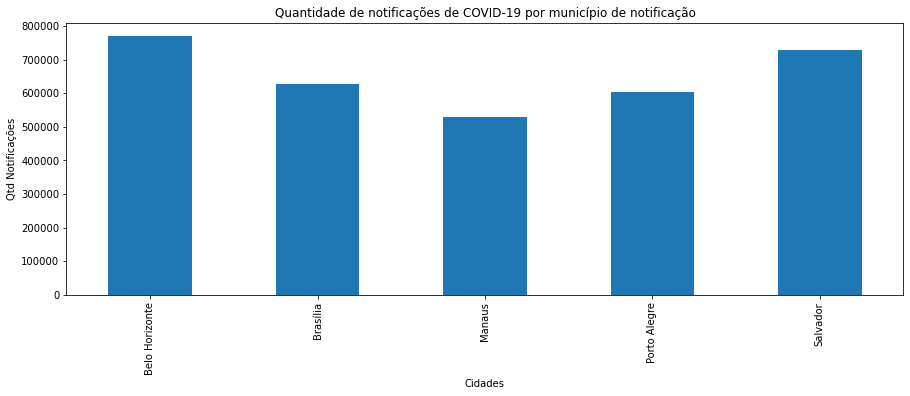

In [25]:
dadosCovidTotalInicial.groupby(['municipioNotificacao']).municipioNotificacao.count().plot(
    kind='bar',title='Quantidade de notificações de COVID-19 por município de notificação',
    xlabel = "Cidades", ylabel = "Qtd Notificações", figsize=(15,5))

### Casos notificados de Covid-19 (tratamento de dados de notificação)

In [26]:
notificacoesBrasilia = dadosCovidTotalInicial.loc[(dadosCovidTotalInicial.municipioNotificacao == 'Brasília')]
notificacoesBrasilia.shape

(627178, 29)

In [27]:
#verificação do completitude da variável classificacaoFinal
dadosCovidTotalInicial.groupby(['classificacaoFinal'], as_index=False).size()

,classificacaoFinal,size
0,Confirmado Clínico-Epidemiológico,11472
1,Confirmado Clínico-Imagem,351
2,Confirmado Laboratorial,515673
3,Confirmado por Critério Clínico,13063
4,Confirmação Laboratorial,197
5,Descartado,541929
6,Síndrome Gripal Não Especificada,93803


In [28]:
dadosCovidTotalInicial.classificacaoFinal.isna().sum()

2085293

In [29]:
#descartar os casos notificados com status de Descartado ou Síndrome Gripal Não Especificada
arrConfirmados = ['Confirmado Clínico-Epidemiológico','Confirmado Clínico-Imagem',
                  'Confirmado Laboratorial','Confirmado por Critério Clínico','Confirmação Laboratorial',np.nan]
casosCovid = dadosCovidTotalInicial.loc[(dadosCovidTotalInicial.classificacaoFinal.isin(arrConfirmados))]
casosCovid.shape

(2626049, 29)

### Excluir casos com evolução do caso "Cancelado" 

In [30]:
casosCovid.groupby(['evolucaoCaso'], as_index=False).size()

,evolucaoCaso,size
0,Cancelado,113243
1,Cura,334910
2,Em tratamento domiciliar,26668
3,Ignorado,41066
4,Internado,1544
5,Internado em UTI,330
6,Óbito,5920


In [31]:
casosCovid = casosCovid.loc[(casosCovid.evolucaoCaso != 'Cancelado')]
casosCovid.shape

(2512806, 29)

In [32]:
casosCovid.groupby(['municipioNotificacao']).size()

municipioNotificacao
Belo Horizonte    736442
Brasília          572778
Manaus            374957
Porto Alegre      260086
Salvador          568543
dtype: int64

<AxesSubplot:title={'center':'Quantidade de notificações de COVID-19 por município de notificação'}, xlabel='Cidades', ylabel='Qtd Notificações'>

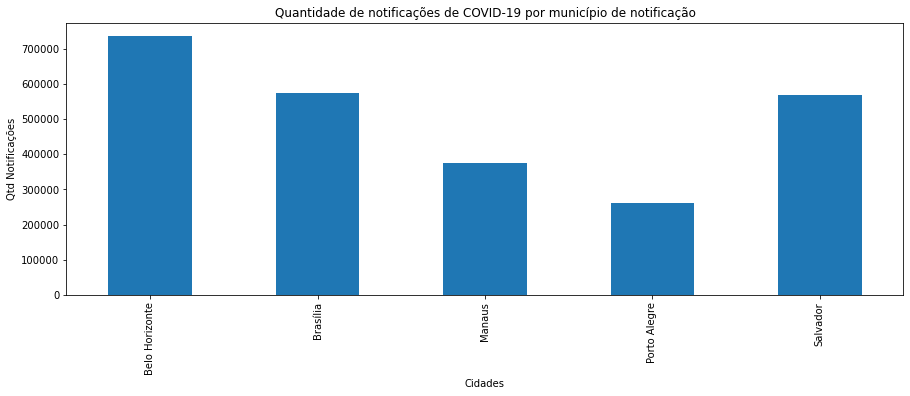

In [33]:
casosCovid.groupby(['municipioNotificacao']).municipioNotificacao.count().plot(
    kind='bar',title='Quantidade de notificações de COVID-19 por município de notificação',
    xlabel = "Cidades", ylabel = "Qtd Notificações", figsize=(15,5))

In [34]:
casosCovid.head(10)

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,3C7qsPzF6m,2020-08-31T03:00:54.630Z,2020-08-23 00:00:00+00:00,undefined,"Dor de Cabeça, Outros, Dispneia, Tosse",Não,NaN,Doenças cardíacas crônicas,Exame Não Solicitado,NaN,NaN,NaN,undefined,Feminino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,27.0,NaN,NaN,NaN
1,yMTbpMAYx3,2020-06-16T21:51:33.510Z,2020-06-16 00:00:00+00:00,undefined,Outros,Não,NaN,NaN,Concluído,2020-06-16T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,undefined,Feminino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,32.0,2020-07-22T03:00:00.000Z,Cura,Confirmado Laboratorial
2,pEOL4EA6jw,2020-08-31T03:00:53.556Z,2020-08-20 00:00:00+00:00,undefined,Assintomático,Não,NaN,NaN,Coletado,2020-08-29T03:00:00.000Z,NaN,NaN,undefined,Masculino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,26.0,NaN,NaN,NaN
4,ulMDCbm0Uc,2020-08-31T03:00:24.168Z,2020-08-09 00:00:00+00:00,undefined,"Coriza, Febre, Dor de Garganta",Não,NaN,NaN,Concluído,2020-08-14T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,80.0,2020-08-31T03:00:00.000Z,Cura,Confirmado Laboratorial
5,22xRj2kyWE,2020-08-31T03:00:29.372Z,2020-08-28 00:00:00+00:00,undefined,Assintomático,Não,NaN,NaN,Coletado,2020-08-28T03:00:00.000Z,NaN,NaN,undefined,Masculino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,31.0,NaN,NaN,NaN
6,ymu1cHJMmV,2020-05-15T03:00:00.000Z,2020-05-10 00:00:00+00:00,undefined,Outros,Não,NaN,NaN,Concluído,2020-05-15T03:00:00.000Z,TESTE RÁPIDO - ANTICORPO,Positivo,undefined,Feminino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,40.0,2020-06-27T03:00:00.000Z,Cura,Confirmado Laboratorial
9,I8wwsdyTYX,2020-08-31T03:00:09.990Z,2020-08-28 00:00:00+00:00,undefined,Assintomático,Não,NaN,NaN,Coletado,2020-08-28T03:00:00.000Z,NaN,NaN,undefined,Feminino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,37.0,NaN,NaN,NaN
10,yNRjw3fApM,2020-08-31T03:00:30.663Z,2020-08-27 00:00:00+00:00,undefined,Dor de Garganta,Não,NaN,NaN,Solicitado,NaN,NaN,NaN,undefined,Feminino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,23.0,NaN,NaN,NaN
11,4vVbTk51fA,2020-06-25T17:58:28.626Z,2020-06-22 00:00:00+00:00,undefined,"Febre, Tosse, Dor de Garganta, Dispneia",Não,NaN,NaN,Concluído,2020-06-25T03:00:00.000Z,RT-PCR,Positivo,undefined,Masculino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,30.0,2020-08-31T03:00:00.000Z,Cura,Confirmado Clínico-Epidemiológico
13,Y627ciNDEY,2020-08-31T03:00:21.894Z,2020-08-25 00:00:00+00:00,undefined,"Febre, Dor de Garganta, Tosse",Não,NaN,NaN,Solicitado,NaN,NaN,NaN,undefined,Feminino,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,DISTRITO FEDERAL,53.0,Brasília,5.30e+06,undefined,undefined,31.0,NaN,NaN,NaN


## Agrupamento de notificações por data de início de primeiros sintomas e município de notificação

In [35]:
casosCovid.shape

(2512806, 29)

### Agrupar casos por data de início de sintomas e sexo

In [36]:
qtdCasosDtInicioSintomas = casosCovid.groupby(['dataInicioSintomas','municipioNotificacao'], as_index=False).size()
qtdCasosDtInicioSintomas.columns = ['dataInicioSintomas','municipioNotificacao','numCasosCovid']
qtdCasosDtInicioSintomas.shape

(2117, 3)

### Verificação do agrupamento

In [37]:
qtdCasosDtInicioSintomas.head(10)

,dataInicioSintomas,municipioNotificacao,numCasosCovid
0,2020-04-01 00:00:00+00:00,Belo Horizonte,975
1,2020-04-01 00:00:00+00:00,Brasília,302
2,2020-04-01 00:00:00+00:00,Manaus,746
3,2020-04-01 00:00:00+00:00,Porto Alegre,35
4,2020-04-01 00:00:00+00:00,Salvador,282
5,2020-04-02 00:00:00+00:00,Belo Horizonte,615
6,2020-04-02 00:00:00+00:00,Brasília,167
7,2020-04-02 00:00:00+00:00,Manaus,399
8,2020-04-02 00:00:00+00:00,Porto Alegre,20
9,2020-04-02 00:00:00+00:00,Salvador,213


### Gráfico de número de casos confirmados de Covid-19 por dia 

<AxesSubplot:title={'center':'Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - Brasília(DF)'}, xlabel='Data de início de primeiros sintomas', ylabel='Qtd Notificações'>

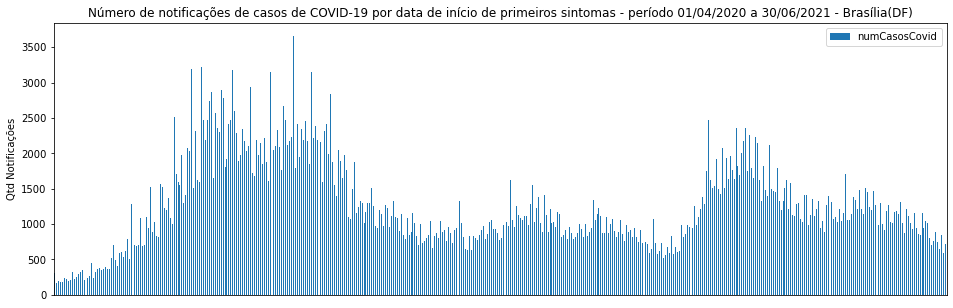

In [38]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
confirmadosDF = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.municipioNotificacao == 'Brasília')]
confirmadosDF.plot(kind="bar",
                   title='Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - Brasília(DF)',
                   x='dataInicioSintomas',y='numCasosCovid', figsize=(16,5), stacked=True,
                   xlabel = "Data de início de primeiros sintomas", ylabel = "Qtd Notificações", ax=ax)

<AxesSubplot:title={'center':'Número de casos de Covid19 por dia - período 01/04/2020 ate 30/05/2021 (Salvador-BA)'}, xlabel='Data de início de primeiros sintomas', ylabel='Qtd Notificações'>

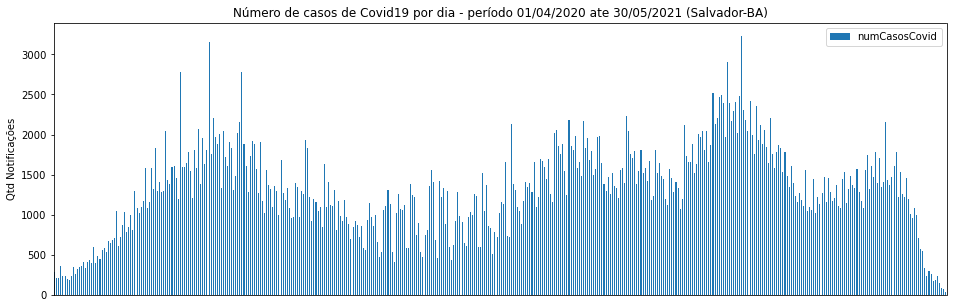

In [39]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
confirmadosDF = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.municipioNotificacao == 'Salvador')]
confirmadosDF.plot(kind="bar",title='Número de casos de Covid19 por dia - período 01/04/2020 ate 30/05/2021 (Salvador-BA)',
                   x='dataInicioSintomas',y='numCasosCovid', figsize=(16,5), stacked=True,
                   xlabel = "Data de início de primeiros sintomas", ylabel = "Qtd Notificações", ax=ax)

<AxesSubplot:title={'center':'Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - (Manaus-AM)'}, xlabel='Data de início de primeiros sintomas', ylabel='Qtd Notificações'>

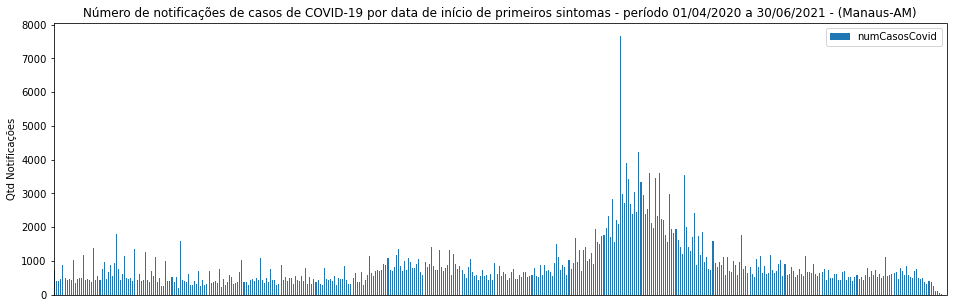

In [40]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
confirmadosDF = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.municipioNotificacao == 'Manaus')]
confirmadosDF.plot(kind="bar",title='Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - (Manaus-AM)',
                      x='dataInicioSintomas',y='numCasosCovid', figsize=(16,5), stacked=True,
                    xlabel = "Data de início de primeiros sintomas", ylabel = "Qtd Notificações", ax=ax)

<AxesSubplot:title={'center':'Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - (Porto Alegre-RS)'}, xlabel='Data de início de primeiros sintomas', ylabel='Qtd Notificações'>

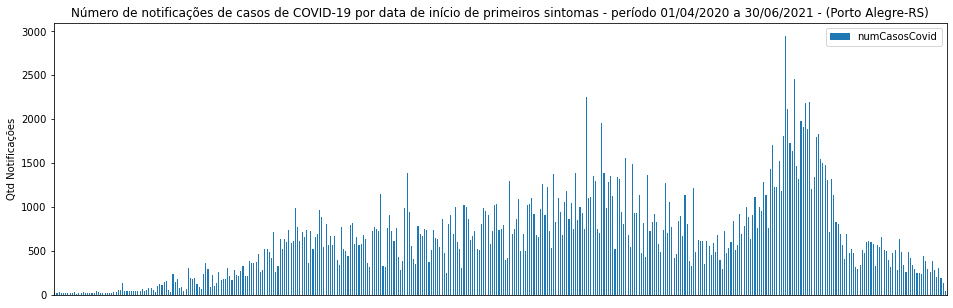

In [41]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
confirmadosDF = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.municipioNotificacao == 'Porto Alegre')]
confirmadosDF.plot(kind="bar",title='Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - (Porto Alegre-RS)',
                      x='dataInicioSintomas',y='numCasosCovid', figsize=(16,5), stacked=True,
                    xlabel = "Data de início de primeiros sintomas", ylabel = "Qtd Notificações", ax=ax)

<AxesSubplot:title={'center':'Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - (Belo Horizonte-MG)'}, xlabel='Data de início de primeiros sintomas', ylabel='Qtd Notificações'>

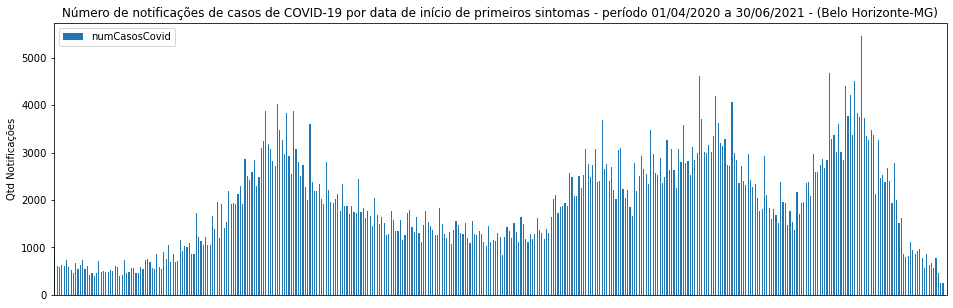

In [42]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
confirmadosDF = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.municipioNotificacao == 'Belo Horizonte')]
confirmadosDF.plot(kind="bar",title='Número de notificações de casos de COVID-19 por data de início de primeiros sintomas - período 01/04/2020 a 30/06/2021 - (Belo Horizonte-MG)',
                      x='dataInicioSintomas',y='numCasosCovid', figsize=(16,5), stacked=True,
                    xlabel = "Data de início de primeiros sintomas", ylabel = "Qtd Notificações", ax=ax)

## Carregamento de dados de mobilidade

Base de dados obtida do seguinte [link](https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip)

In [43]:
#dados mobilidade coletados pelo Google
mobilidade2020 = pd.read_csv("dados/2020_BR_Region_Mobility_Report.csv",low_memory=False)
mobilidade2021 = pd.read_csv("dados/2021_BR_Region_Mobility_Report.csv",low_memory=False)
frames = [mobilidade2020, mobilidade2021]
  
mobilidadeTodas = pd.concat(frames)
mobilidadeTodas.shape
del mobilidade2020
del mobilidade2021

### Mobilidade de Belo Horizonte

In [44]:
mobilidadeBH = mobilidadeTodas[mobilidadeTodas.sub_region_2 == "Belo Horizonte"]
mobilidadeBH.shape

(511, 15)

### Mobilidade do Distrito Federal

In [45]:
mobilidadeDF = mobilidadeTodas[mobilidadeTodas.sub_region_1 == "Federal District"]
mobilidadeDF.shape

(511, 15)

### Mobilidade de Porto Alegre

In [46]:
mobilidadePOA = mobilidadeTodas[mobilidadeTodas.sub_region_2 == "Porto Alegre"]
mobilidadePOA.shape

(511, 15)

### Mobilidade de Manaus

In [47]:
mobilidadeMAN = mobilidadeTodas[mobilidadeTodas.sub_region_2 == "Manaus"]
mobilidadeMAN.shape

(511, 15)

### Mobilidade de Salvador

In [48]:
mobilidadeSSA = mobilidadeTodas[mobilidadeTodas.sub_region_2 == "Salvador"]
mobilidadeSSA.shape

(511, 15)

## Concatenar as bases de mobilidade

In [49]:
mobilidade = pd.concat([mobilidadeBH,mobilidadeDF,mobilidadePOA,mobilidadeMAN,mobilidadeSSA])
mobilidade.shape

(2555, 15)

In [50]:
mobilidade.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
metro_area                                            float64
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [51]:
del mobilidadeBH,mobilidadeDF,mobilidadePOA,mobilidadeMAN,mobilidadeSSA

### Selecionada a informação de variação percentual de estações de transporte público

In [52]:
colunas = ['sub_region_1','sub_region_2','date',
           'transit_stations_percent_change_from_baseline',
           'workplaces_percent_change_from_baseline',
           'residential_percent_change_from_baseline']
mobilidade = mobilidade.filter(colunas)  

In [53]:
mobilidade.head()

,sub_region_1,sub_region_2,date,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
168504,State of Minas Gerais,Belo Horizonte,2020-02-15,12.0,9.0,-1.0
168505,State of Minas Gerais,Belo Horizonte,2020-02-16,8.0,0.0,1.0
168506,State of Minas Gerais,Belo Horizonte,2020-02-17,10.0,19.0,-1.0
168507,State of Minas Gerais,Belo Horizonte,2020-02-18,11.0,18.0,-2.0
168508,State of Minas Gerais,Belo Horizonte,2020-02-19,11.0,18.0,-2.0


## Verificação dos tipos de dados

In [54]:
casosCovid.dtypes

ÿid                                      object
dataNotificacao                          object
dataInicioSintomas          datetime64[ns, UTC]
dataNascimento                           object
sintomas                                 object
profissionalSaude                        object
cbo                                      object
condicoes                                object
estadoTeste                              object
dataTeste                                object
tipoTeste                                object
resultadoTeste                           object
paisOrigem                               object
sexo                                     object
estado                                   object
estadoIBGE                              float64
municipio                                object
municipioIBGE                           float64
origem                                   object
estadoNotificacao                        object
estadoNotificacaoIBGE                   

In [55]:
mobilidade.dtypes

sub_region_1                                      object
sub_region_2                                      object
date                                              object
transit_stations_percent_change_from_baseline    float64
workplaces_percent_change_from_baseline          float64
residential_percent_change_from_baseline         float64
dtype: object

### Exemplos de visualização da variação de mobilidade nas estações de transporte público 
Período de 01/04/2020 a 30/05/2021

<AxesSubplot:title={'center':'Mobilidade nas estações de transp. público no período em Belo Horizonte de 01/04/2020 a 30/05/2021'}, xlabel='date'>

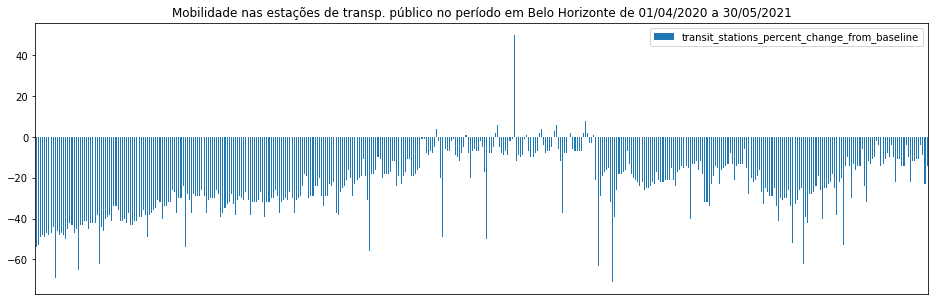

In [56]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Belo Horizonte')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade nas estações de transp. público no período em Belo Horizonte de 01/04/2020 a 30/05/2021',x='date',y='transit_stations_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade em locais de trabalho no período em Belo Horizonte-MG de 01/04/2020 a 30/05/2021'}, xlabel='date'>

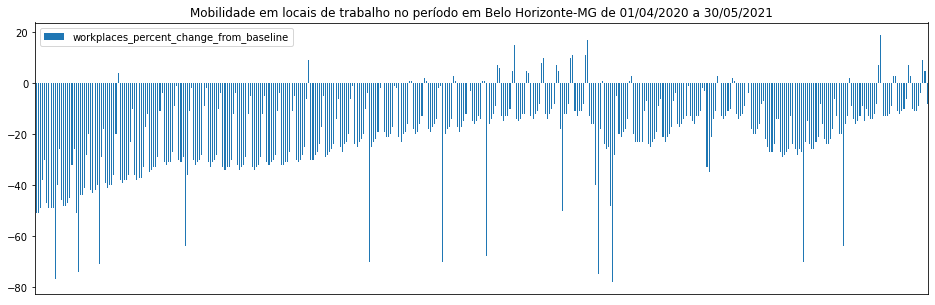

In [62]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Belo Horizonte')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade em locais de trabalho no período em Belo Horizonte-MG de 01/04/2020 a 30/05/2021',x='date',y='workplaces_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade em locais de residenciais no período em Belo Horizonte-MG de 01/04/2020 a 30/05/2021'}, xlabel='date'>

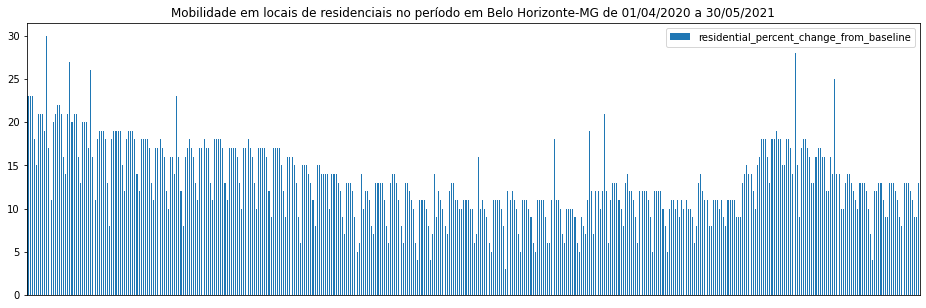

In [63]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Belo Horizonte')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade em locais de residenciais no período em Belo Horizonte-MG de 01/04/2020 a 30/05/2021',x='date',y='residential_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade nas estações de transp. público no período em Manaus-AM de 01/04/2020 a 30/05/2021'}, xlabel='date'>

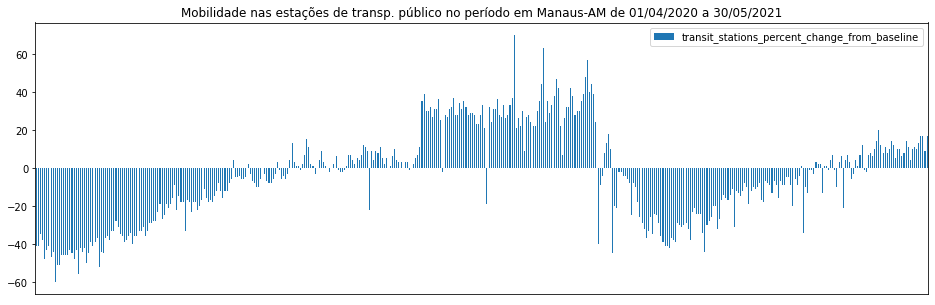

In [57]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Manaus')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade nas estações de transp. público no período em Manaus-AM de 01/04/2020 a 30/05/2021',x='date',y='transit_stations_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade em locais de trabalho no período em Manaus-AM de 01/04/2020 a 30/05/2021'}, xlabel='date'>

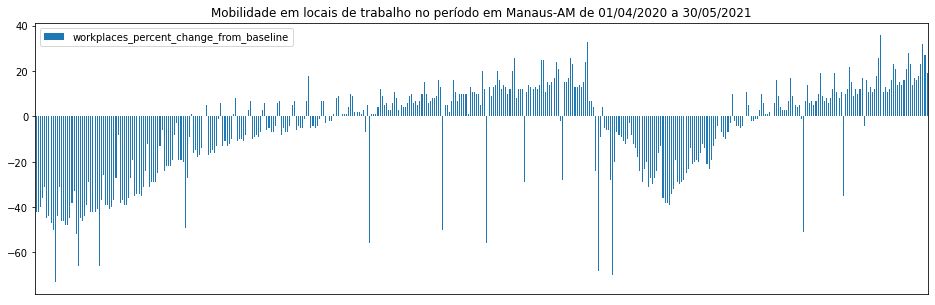

In [58]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Manaus')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade em locais de trabalho no período em Manaus-AM de 01/04/2020 a 30/05/2021',x='date',y='workplaces_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade em locais de residenciais no período em Manaus-AM de 01/04/2020 a 30/05/2021'}, xlabel='date'>

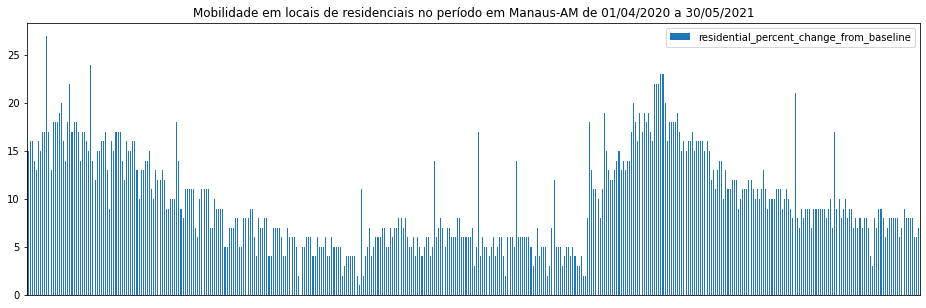

In [59]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Manaus')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade em locais de residenciais no período em Manaus-AM de 01/04/2020 a 30/05/2021',x='date',y='residential_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade nas estações de transp. público no período em Salvador-BA de 01/04/2020 a 30/05/2021'}, xlabel='date'>

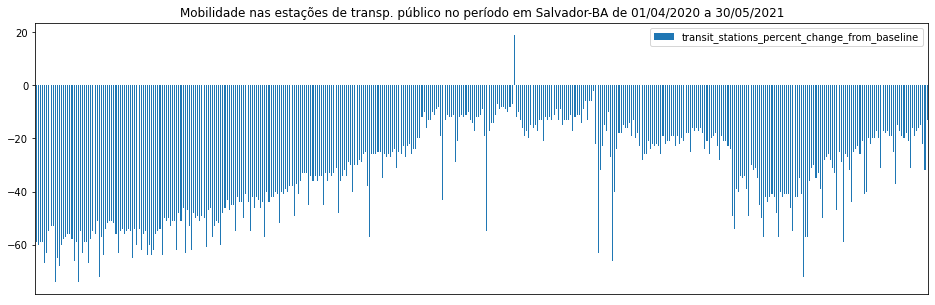

In [60]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_2 == 'Salvador')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade nas estações de transp. público no período em Salvador-BA de 01/04/2020 a 30/05/2021',x='date',y='transit_stations_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

<AxesSubplot:title={'center':'Mobilidade nas estações de transp. público no período em Brasília-DF de 01/04/2020 a 30/05/2021'}, xlabel='date'>

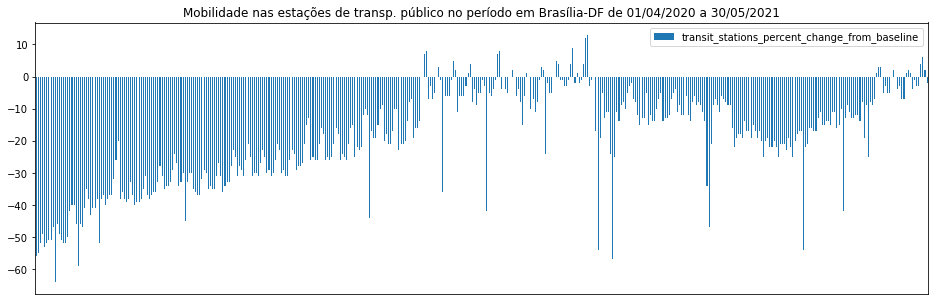

In [61]:
fig, ax = plt.subplots() 
ax = plt.axes()
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
mobilidadeRecorte = mobilidade.loc[(mobilidade.date > '2020-03-31') & (mobilidade.date < '2021-06-01') & (mobilidade.sub_region_1 == 'Federal District')]
mobilidadeRecorte.plot(kind="bar",title='Mobilidade nas estações de transp. público no período em Brasília-DF de 01/04/2020 a 30/05/2021',x='date',y='transit_stations_percent_change_from_baseline', figsize=(16,5), stacked=True, ax=ax)
 

### Incluir no dataset de casos confirmados agrupados por dia e sexo a informação de variação de mobilidade 
Nessa função, inlui-se a variação da mobilidade de 5 dias antes, que é, normalmente, o tempo para aparecer os primeiros sintomas do dia que contraiu o vírus - segundo a [OPAS](https://www.paho.org/pt/covid19)

Cria-se indicadores de aumento ou diminuição de variação de mobilidade significativa. Foi adotado o valor de 5% para indicar essa variação significativa

In [65]:
def incluirVariacaoMobilidade(x,mobilidade,qtdDiasAnteriores):
    date = x['dataInicioSintomas']
    dataAnterior = date - timedelta(days=qtdDiasAnteriores)
    dataMAnterior = date - timedelta(days=qtdDiasAnteriores+1)
    regiao = 'Federal District'
    if x['municipioNotificacao'] == 'Belo Horizonte':
        regiao = 'State of Minas Gerais'
    if x['municipioNotificacao'] == 'Porto Alegre':
        regiao = 'State of Rio Grande do Sul'
    if x['municipioNotificacao'] == 'Manaus':
        regiao = 'State of Amazonas'
    if x['municipioNotificacao'] == 'Salvador':
        regiao = 'State of Bahia'
        
        
    mobilidadeFiltro = mobilidade.loc[(mobilidade['sub_region_1'] == regiao)]
    
    mobilidadeDate = mobilidadeFiltro[mobilidadeFiltro['date'] == dataAnterior]
    mobilidadeDateAnterior = mobilidadeFiltro[mobilidadeFiltro['date'] == dataMAnterior]
    m = mobilidadeDateAnterior['transit_stations_percent_change_from_baseline'].item()
    
    #se aumentou a variacao de mobilidade = 1
    #se diminuiu a variacao de mobilidade = 0
   
    if len(mobilidadeDate.index) > 0 :
        #transit_stations_percent_change_from_baseline
        m2 = mobilidadeDate['transit_stations_percent_change_from_baseline'].item()          
        diferencaMobilidade = m2-m
        x['mobiTransporteAnteriorExposicao'] = m    
        x['mobiTransporteExposicao']=   m2 
        x['difMobTransporte']=diferencaMobilidade
        
        #workplaces_percent_change_from_baseline
        mobilidadeTrabalho = mobilidadeDate['workplaces_percent_change_from_baseline'].item()
        mobilidadeTrabalhoAnterior = mobilidadeDateAnterior['workplaces_percent_change_from_baseline'].item()
        difMobTrabalho = mobilidadeTrabalho-mobilidadeTrabalhoAnterior
        x['mobiTrabalhoAnteriorExposicao'] =     mobilidadeTrabalhoAnterior 
        x['mobiTrabalhoExposicao']=   mobilidadeTrabalho
        x['difMobTrabalho']=difMobTrabalho
        
        #residential_percent_change_from_baseline
        mobilidadeResidencia = mobilidadeDate['residential_percent_change_from_baseline'].item()
        mobilidadeResidenciaAnterior = mobilidadeDateAnterior['residential_percent_change_from_baseline'].item()
        difMobResidencia = mobilidadeResidencia-mobilidadeResidenciaAnterior
        x['mobiResidenciaAnteriorExposicao'] =     mobilidadeResidenciaAnterior 
        x['mobiResidenciaExposicao']=   mobilidadeResidencia
        x['difMobResidencia']=difMobResidencia
        
        #diferença de aumento de mobilidade significativa
        if diferencaMobilidade >= 5 or difMobTrabalho >=5 or difMobResidencia <= -5:
            x['aumentoMobilidadeSignificativa'] = 1
        else:
            x['aumentoMobilidadeSignificativa'] = 0
            
        
        #diferença de diminuicao de mobilidade significativa
        if diferencaMobilidade <= -5 or difMobTrabalho <= -5 or difMobResidencia >= 5:
            x['diminuicaoMobilidadeSignificativa'] = 1
        else:
            x['diminuicaoMobilidadeSignificativa'] = 0
    return x


#transformar data do dotaset de mobilidade para o tipo datetime
mobilidade['date'] = pd.to_datetime(mobilidade['date'],utc=True).dt.floor('d') 

#%incluir variáveis de mobilidade indicando a variação 5 dias antes da data de inicio de primeiro sintomas
qtdCasosDtInicioSintomas=qtdCasosDtInicioSintomas.apply(
    lambda row: 
        incluirVariacaoMobilidade(
            row,
            mobilidade,
            qtdDiasAnteriores=5),  
        axis=1);

### Verificação do novo dataset
Foi incluída a informação da variação de mobilidade das estações de transporte público do DF (5 dias antes)

In [66]:
qtdCasosDtInicioSintomas.head(10)

,dataInicioSintomas,municipioNotificacao,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa
0,2020-04-01 00:00:00+00:00,Belo Horizonte,975,-58.0,-55.0,3.0,-55.0,-52.0,3.0,25.0,25.0,0.0,0,0
1,2020-04-01 00:00:00+00:00,Brasília,302,-62.0,-59.0,3.0,-58.0,-55.0,3.0,27.0,28.0,1.0,0,0
2,2020-04-01 00:00:00+00:00,Manaus,746,-45.0,-42.0,3.0,-41.0,-39.0,2.0,16.0,16.0,0.0,0,0
3,2020-04-01 00:00:00+00:00,Porto Alegre,35,-65.0,-64.0,1.0,-63.0,-61.0,2.0,30.0,31.0,1.0,0,0
4,2020-04-01 00:00:00+00:00,Salvador,282,-66.0,-64.0,2.0,-56.0,-54.0,2.0,25.0,27.0,2.0,0,0
5,2020-04-02 00:00:00+00:00,Belo Horizonte,615,-55.0,-54.0,1.0,-52.0,-42.0,10.0,25.0,20.0,-5.0,1,0
6,2020-04-02 00:00:00+00:00,Brasília,167,-59.0,-59.0,0.0,-55.0,-45.0,10.0,28.0,23.0,-5.0,1,0
7,2020-04-02 00:00:00+00:00,Manaus,399,-42.0,-43.0,-1.0,-39.0,-34.0,5.0,16.0,13.0,-3.0,1,0
8,2020-04-02 00:00:00+00:00,Porto Alegre,20,-64.0,-61.0,3.0,-61.0,-50.0,11.0,31.0,22.0,-9.0,1,0
9,2020-04-02 00:00:00+00:00,Salvador,213,-64.0,-65.0,-1.0,-54.0,-48.0,6.0,27.0,23.0,-4.0,1,0


In [67]:
qtdCasosDtInicioSintomas.describe()

,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa
count,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00,2117.00
mean,1186.97,-23.32,-23.21,0.11,-18.14,-18.03,0.11,13.37,13.34,-0.03,0.37,0.29
std,806.05,21.37,21.33,9.39,19.02,18.98,14.69,5.32,5.29,3.24,0.48,0.45
min,1.00,-74.00,-74.00,-64.00,-79.00,-79.00,-75.00,0.00,0.00,-15.00,0.00,0.00
25%,594.00,-39.00,-39.00,-3.00,-30.00,-30.00,-2.00,10.00,9.00,-1.00,0.00,0.00
50%,1017.00,-24.00,-24.00,0.00,-17.00,-17.00,1.00,13.00,13.00,0.00,0.00,0.00
75%,1586.00,-10.00,-10.00,4.00,-5.00,-5.00,4.00,17.00,17.00,1.00,1.00,1.00
max,7664.00,70.00,70.00,51.00,36.00,36.00,69.00,34.00,34.00,15.00,1.00,1.00


<AxesSubplot:>

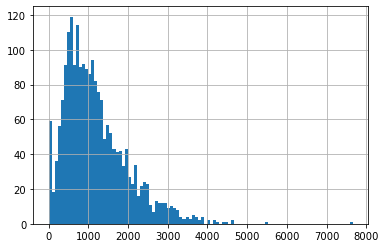

In [68]:
qtdCasosDtInicioSintomas['numCasosCovid'].hist(bins=100)

<AxesSubplot:>

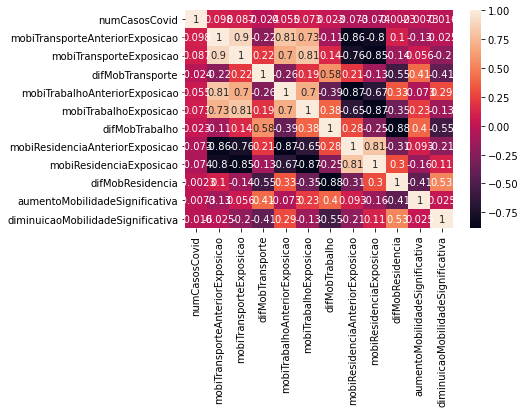

In [69]:
import seaborn as sns
sns.heatmap(qtdCasosDtInicioSintomas.corr(), annot=True)

In [70]:
qtdCasosDtInicioSintomas.dtypes

dataInicioSintomas                   datetime64[ns, UTC]
municipioNotificacao                              object
numCasosCovid                                      int64
mobiTransporteAnteriorExposicao                  float64
mobiTransporteExposicao                          float64
difMobTransporte                                 float64
mobiTrabalhoAnteriorExposicao                    float64
mobiTrabalhoExposicao                            float64
difMobTrabalho                                   float64
mobiResidenciaAnteriorExposicao                  float64
mobiResidenciaExposicao                          float64
difMobResidencia                                 float64
aumentoMobilidadeSignificativa                     int64
diminuicaoMobilidadeSignificativa                  int64
dtype: object

### Incluir variável target
Cria-se a variável target que indica que, se houve uma variação significativa de mobilidade nas estações de transporte público, aumenta o número de casos de Covid-19, ou o contrário, se uma variação negativa, espare-se a diminuição de notificação.
<br>A média móvel do número de casos é de 14 dias antes

In [71]:
def calculaVariacaoCasos(x,qtdCasosDtInicioSintomas,qtdDiasAnteriores):
    
    #calcular a media de X dias antes do dia corrente
    date = x['dataInicioSintomas']
    d1 = date - timedelta(days=qtdDiasAnteriores)
    #busca os dados dos X dias anteriores
    diasAnt = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.dataInicioSintomas > d1) & 
                                           (qtdCasosDtInicioSintomas.dataInicioSintomas <= date) &
                                           (qtdCasosDtInicioSintomas.municipioNotificacao ==  x['municipioNotificacao'])]
    #calcula a média de número de casos X dias anterior a data de início de sintomas vigente
    mediaDiasAnteriores = diasAnt['numCasosCovid'].mean()
    
    #calcular a média dos dias que antecederam a mobilidade, ou seja, a média dos 14 dias a 5 dias antes da data de ínicio 
    #dos sintomas vigente
    d2 = date - timedelta(days=5)
    d3 = d2 - timedelta(days=qtdDiasAnteriores)
    
    diasAnt2 = qtdCasosDtInicioSintomas.loc[(qtdCasosDtInicioSintomas.dataInicioSintomas > d3) & 
                                           (qtdCasosDtInicioSintomas.dataInicioSintomas <= d2) &
                                           (qtdCasosDtInicioSintomas.municipioNotificacao ==  x['municipioNotificacao'])]
    mediaNumNotifnoDiaMob = diasAnt2['numCasosCovid'].mean()
    
    x['mediaDiasAnteriores'] = mediaDiasAnteriores
    x['mediaNumNotifnoDiaExposicao'] = mediaNumNotifnoDiaMob
    #verificar se houve aumento na mobilidade ou diminuição
    aumentoMobilidadeSignificativa = x['aumentoMobilidadeSignificativa']
    diminuicaoMobilidadeSignificativa = x['diminuicaoMobilidadeSignificativa']
    difMobTransporte = x['difMobTransporte'] 
    x['target'] = 0
    x['varNumeroCasos']= ((x['numCasosCovid'] - mediaDiasAnteriores)/mediaDiasAnteriores)*100
    if aumentoMobilidadeSignificativa  == 1:
        #espera-se que aumente o número de casos comparado com a media dos dias anteriores
        if mediaDiasAnteriores < x['numCasosCovid']:
            x['target']=1
        else:
            x['target']=0
    elif diminuicaoMobilidadeSignificativa == 1:
        #espera-se que diminua o número de casos 
        if mediaDiasAnteriores > x['numCasosCovid']:
            x['target']=1
        else:
            x['target']=0    
    else:        
        if (x['numCasosCovid'] < mediaDiasAnteriores ) & (difMobTransporte < 0 or x['difMobTrabalho'] < 0 or x['difMobResidencia'] < 0):
            x['target']=1
        elif (x['numCasosCovid'] > mediaDiasAnteriores ) & (difMobTransporte > 0 or x['difMobTrabalho'] > 0 or x['difMobResidencia'] > 0):
            x['target']=1 
    return x




#% verificar se houve aumento de numero de casos notificados 
casosConfirmadosMedia14=qtdCasosDtInicioSintomas.apply(
    lambda row: 
        calculaVariacaoCasos(
            row,
            qtdCasosDtInicioSintomas,
            qtdDiasAnteriores=14), 
        axis=1);



In [72]:
casosConfirmadosMedia14.dtypes

dataInicioSintomas                   datetime64[ns, UTC]
municipioNotificacao                              object
numCasosCovid                                      int64
mobiTransporteAnteriorExposicao                  float64
mobiTransporteExposicao                          float64
difMobTransporte                                 float64
mobiTrabalhoAnteriorExposicao                    float64
mobiTrabalhoExposicao                            float64
difMobTrabalho                                   float64
mobiResidenciaAnteriorExposicao                  float64
mobiResidenciaExposicao                          float64
difMobResidencia                                 float64
aumentoMobilidadeSignificativa                     int64
diminuicaoMobilidadeSignificativa                  int64
mediaDiasAnteriores                              float64
mediaNumNotifnoDiaExposicao                      float64
target                                             int64
varNumeroCasos                 

In [73]:
pd.options.display.float_format = "{:,.2f}".format
casosConfirmadosMedia14.head()

,dataInicioSintomas,municipioNotificacao,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa,mediaDiasAnteriores,mediaNumNotifnoDiaExposicao,target,varNumeroCasos
0,2020-04-01 00:00:00+00:00,Belo Horizonte,975,-58.00,-55.00,3.00,-55.00,-52.00,3.00,25.00,25.00,0.00,0,0,975.00,nan,0,0.00
1,2020-04-01 00:00:00+00:00,Brasília,302,-62.00,-59.00,3.00,-58.00,-55.00,3.00,27.00,28.00,1.00,0,0,302.00,nan,0,0.00
2,2020-04-01 00:00:00+00:00,Manaus,746,-45.00,-42.00,3.00,-41.00,-39.00,2.00,16.00,16.00,0.00,0,0,746.00,nan,0,0.00
3,2020-04-01 00:00:00+00:00,Porto Alegre,35,-65.00,-64.00,1.00,-63.00,-61.00,2.00,30.00,31.00,1.00,0,0,35.00,nan,0,0.00
4,2020-04-01 00:00:00+00:00,Salvador,282,-66.00,-64.00,2.00,-56.00,-54.00,2.00,25.00,27.00,2.00,0,0,282.00,nan,0,0.00


## Verificação do dataset

### Retirar o primeiro dia

In [74]:
casosConfirmadosMedia14.shape

(2117, 18)

In [75]:
casosConfirmadosMedia14.dropna(subset = ["mediaDiasAnteriores",'mediaNumNotifnoDiaExposicao'], inplace=True)


In [76]:
casosConfirmadosMedia14.shape

(2091, 18)

In [77]:
casosConfirmadosMedia14.tail()

,dataInicioSintomas,municipioNotificacao,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa,mediaDiasAnteriores,mediaNumNotifnoDiaExposicao,target,varNumeroCasos
2112,2021-06-26 00:00:00+00:00,Brasília,746,6.00,-2.00,-8.00,20.00,-6.00,-26.00,6.00,10.00,4.00,0,1,916.79,"1,010.64",1,-18.63
2113,2021-06-27 00:00:00+00:00,Brasília,644,-2.00,1.00,3.00,-6.00,-4.00,2.00,10.00,9.00,-1.00,0,0,896.36,995.50,1,-28.15
2114,2021-06-28 00:00:00+00:00,Brasília,840,1.00,-1.00,-2.00,-4.00,-4.00,0.00,9.00,10.00,1.00,0,0,873.36,983.79,1,-3.82
2115,2021-06-29 00:00:00+00:00,Brasília,593,-1.00,0.00,1.00,-4.00,-4.00,0.00,10.00,9.00,-1.00,0,0,848.00,952.14,1,-30.07
2116,2021-06-30 00:00:00+00:00,Brasília,719,0.00,4.00,4.00,-4.00,2.00,6.00,9.00,9.00,0.00,1,0,838.14,936.00,0,-14.22


In [78]:
casosConfirmadosMedia14.corr()

,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa,mediaDiasAnteriores,mediaNumNotifnoDiaExposicao,target,varNumeroCasos
numCasosCovid,1.00,0.08,0.07,-0.02,0.04,0.06,0.02,-0.05,-0.05,-0.00,-0.01,-0.02,0.90,0.83,0.08,0.28
mobiTransporteAnteriorExposicao,0.08,1.00,0.90,-0.23,0.81,0.72,-0.11,-0.85,-0.79,0.10,-0.13,-0.02,0.06,0.05,-0.02,-0.03
mobiTransporteExposicao,0.07,0.90,1.00,0.22,0.69,0.81,0.14,-0.76,-0.85,-0.15,0.06,-0.21,0.05,0.04,-0.05,-0.05
difMobTransporte,-0.02,-0.23,0.22,1.00,-0.26,0.19,0.58,0.21,-0.13,-0.56,0.42,-0.41,-0.02,-0.02,-0.07,-0.03
mobiTrabalhoAnteriorExposicao,0.04,0.81,0.69,-0.26,1.00,0.69,-0.39,-0.87,-0.66,0.33,-0.07,0.29,0.04,0.04,-0.05,-0.09
mobiTrabalhoExposicao,0.06,0.72,0.81,0.19,0.69,1.00,0.39,-0.64,-0.87,-0.36,0.24,-0.14,0.04,0.04,-0.07,-0.02
difMobTrabalho,0.02,-0.11,0.14,0.58,-0.39,0.39,1.00,0.29,-0.26,-0.89,0.39,-0.55,-0.01,-0.01,-0.03,0.08
mobiResidenciaAnteriorExposicao,-0.05,-0.85,-0.76,0.21,-0.87,-0.64,0.29,1.00,0.81,-0.31,0.09,-0.21,-0.03,-0.02,0.05,0.03
mobiResidenciaExposicao,-0.05,-0.79,-0.85,-0.13,-0.66,-0.87,-0.26,0.81,1.00,0.31,-0.16,0.11,-0.03,-0.01,0.06,0.01
difMobResidencia,-0.00,0.10,-0.15,-0.56,0.33,-0.36,-0.89,-0.31,0.31,1.00,-0.41,0.52,0.01,0.01,0.01,-0.03


In [79]:
casosConfirmadosMedia14.groupby(['target'], as_index=False).size()

,target,size
0,0,826
1,1,1265


<AxesSubplot:title={'center':'Distribuição da variável target'}, xlabel='Classe', ylabel='Quantidade'>

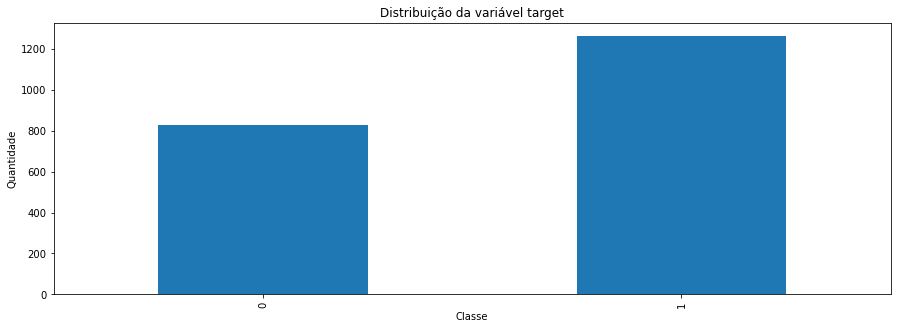

In [82]:
casosConfirmadosMedia14.groupby(['target']).target.count().plot(
    kind='bar',title='Distribuição da variável target',
    xlabel = "Classe", ylabel = "Quantidade", figsize=(15,5))

In [84]:
casosConfirmadosMedia14.to_csv('dados/casosConfirmados.csv', index=False)

In [180]:
casosConfirmadosMedia14 = pd.read_csv("dados/casosConfirmados.csv") 
casosConfirmadosMedia14.head(30)

,dataInicioSintomas,municipioNotificacao,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa,mediaDiasAnteriores,mediaNumNotifnoDiaExposicao,target,varNumeroCasos
0,2020-04-06 00:00:00+00:00,Belo Horizonte,734,-53.00,-54.00,-1.00,-52.00,-51.00,1.00,23.00,23.00,0.00,0,0,689.17,975.00,1,6.51
1,2020-04-06 00:00:00+00:00,Brasília,237,-56.00,-56.00,0.00,-52.00,-52.00,0.00,24.00,24.00,0.00,0,0,210.17,302.00,0,12.77
2,2020-04-06 00:00:00+00:00,Manaus,498,-45.00,-41.00,4.00,-41.00,-42.00,-1.00,15.00,15.00,0.00,0,0,567.00,746.00,1,-12.17
3,2020-04-06 00:00:00+00:00,Porto Alegre,18,-62.00,-61.00,1.00,-59.00,-58.00,1.00,26.00,26.00,0.00,0,0,25.33,35.00,0,-28.95
4,2020-04-06 00:00:00+00:00,Salvador,240,-60.00,-59.00,1.00,-53.00,-51.00,2.00,23.00,23.00,0.00,0,0,254.17,282.00,0,-5.57
5,2020-04-07 00:00:00+00:00,Belo Horizonte,578,-54.00,-53.00,1.00,-51.00,-51.00,0.00,23.00,23.00,0.00,0,0,673.29,795.00,0,-14.15
6,2020-04-07 00:00:00+00:00,Brasília,226,-56.00,-55.00,1.00,-52.00,-52.00,0.00,24.00,24.00,0.00,0,0,212.43,234.50,1,6.39
7,2020-04-07 00:00:00+00:00,Manaus,447,-41.00,-41.00,0.00,-42.00,-42.00,0.00,15.00,16.00,1.00,0,0,549.86,572.50,0,-18.71
8,2020-04-07 00:00:00+00:00,Porto Alegre,23,-61.00,-63.00,-2.00,-58.00,-59.00,-1.00,26.00,28.00,2.00,0,0,25.00,27.50,1,-8.00
9,2020-04-07 00:00:00+00:00,Salvador,197,-59.00,-60.00,-1.00,-51.00,-51.00,0.00,23.00,23.00,0.00,0,0,246.00,247.50,1,-19.92


<AxesSubplot:>

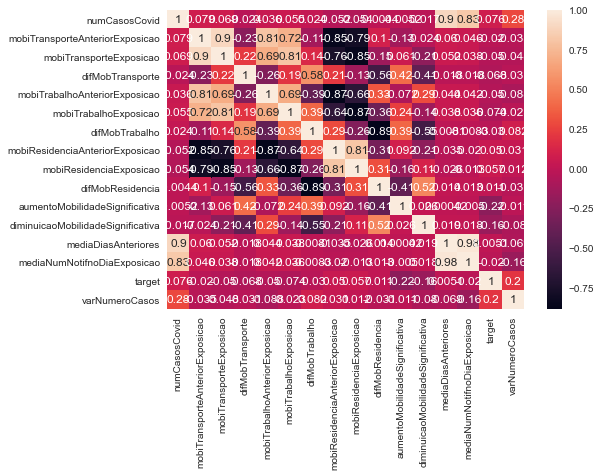

In [86]:
import seaborn as sns
sns.heatmap(casosConfirmadosMedia14.corr(), annot=True)

<AxesSubplot:>

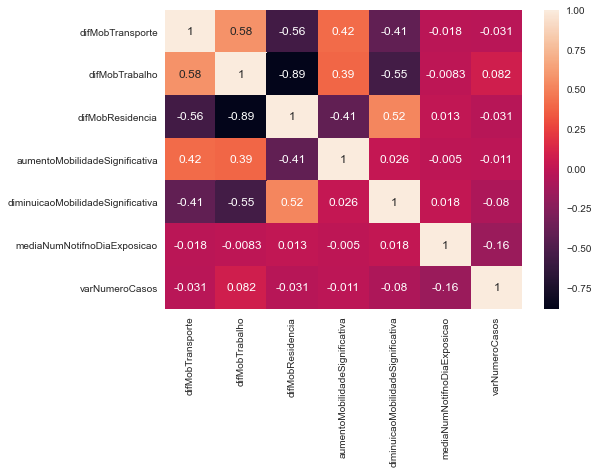

In [181]:
colunas = ['dataInicioSintomas','municipioNotificacao','difMobTransporte','difMobTrabalho','difMobResidencia','aumentoMobilidadeSignificativa','diminuicaoMobilidadeSignificativa','mediaNumNotifnoDiaExposicao','varNumeroCasos']
todosCasos = casosConfirmadosMedia14.filter(colunas)  
sns.heatmap(todosCasos.corr(), annot=True)

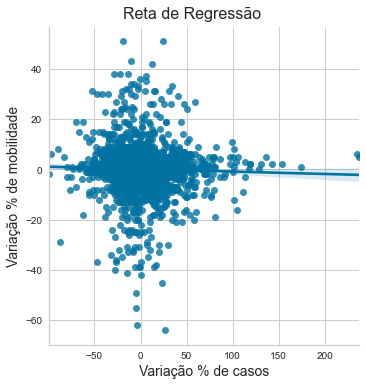

In [182]:
ax = sns.lmplot(x="varNumeroCasos", y="difMobTransporte",data=todosCasos)
ax.fig.suptitle('Reta de Regressão', fontsize=16, y=1.02)
ax.set_xlabels("Variação % de casos", fontsize=14)
ax.set_ylabels("Variação % de mobilidade", fontsize=14)

## Criação de variáveis dummies para município de notificação

In [93]:
dummy_df = pd.get_dummies(casosConfirmadosMedia14,
                         columns = ['municipioNotificacao'],
                          drop_first = True,
                          prefix = ['municipioNotificacao'],
                          prefix_sep = '_' )   

In [94]:
dummy_df.head()

,dataInicioSintomas,numCasosCovid,mobiTransporteAnteriorExposicao,mobiTransporteExposicao,difMobTransporte,mobiTrabalhoAnteriorExposicao,mobiTrabalhoExposicao,difMobTrabalho,mobiResidenciaAnteriorExposicao,mobiResidenciaExposicao,difMobResidencia,aumentoMobilidadeSignificativa,diminuicaoMobilidadeSignificativa,mediaDiasAnteriores,mediaNumNotifnoDiaExposicao,target,varNumeroCasos,municipioNotificacao_Brasília,municipioNotificacao_Manaus,municipioNotificacao_Porto Alegre,municipioNotificacao_Salvador
0,2020-04-06 00:00:00+00:00,734,-53.00,-54.00,-1.00,-52.00,-51.00,1.00,23.00,23.00,0.00,0,0,689.17,975.00,1,6.51,0,0,0,0
1,2020-04-06 00:00:00+00:00,237,-56.00,-56.00,0.00,-52.00,-52.00,0.00,24.00,24.00,0.00,0,0,210.17,302.00,0,12.77,1,0,0,0
2,2020-04-06 00:00:00+00:00,498,-45.00,-41.00,4.00,-41.00,-42.00,-1.00,15.00,15.00,0.00,0,0,567.00,746.00,1,-12.17,0,1,0,0
3,2020-04-06 00:00:00+00:00,18,-62.00,-61.00,1.00,-59.00,-58.00,1.00,26.00,26.00,0.00,0,0,25.33,35.00,0,-28.95,0,0,1,0
4,2020-04-06 00:00:00+00:00,240,-60.00,-59.00,1.00,-53.00,-51.00,2.00,23.00,23.00,0.00,0,0,254.17,282.00,0,-5.57,0,0,0,1


## Criação de dataframe com variáveis selecionadas


In [95]:
expl14 = dummy_df[['mobiTransporteAnteriorExposicao','mobiTransporteExposicao','difMobTransporte',
    'mobiTrabalhoAnteriorExposicao','mobiTrabalhoExposicao','difMobTrabalho',
    'mobiResidenciaAnteriorExposicao','mobiResidenciaExposicao','difMobResidencia',
    'aumentoMobilidadeSignificativa','diminuicaoMobilidadeSignificativa','mediaNumNotifnoDiaExposicao',
    'municipioNotificacao_Brasília','municipioNotificacao_Manaus','municipioNotificacao_Porto Alegre',
    'municipioNotificacao_Salvador']]
target14 = dummy_df['target']
expl14.shape

(2091, 16)

In [96]:
target14.head()

0    1
1    0
2    1
3    0
4    0
Name: target, dtype: int64

# Separação em treino e teste

In [97]:
import imblearn
from collections import Counter
Counter(target14)

Counter({1: 1265, 0: 826})

### Radomizando amostras por causa da amostra desbalanceada

In [98]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(expl14, target14)
# summarize class distribution
print(Counter(y_over))

Counter({1: 1265, 0: 1265})


In [146]:
from sklearn.model_selection import train_test_split 
x_treino14, x_teste14, y_treino14, y_teste14 = train_test_split(X_over,
                                                       y_over,
                                                       test_size=0.3,
                                                       random_state=196)

In [147]:
x_treino14.shape

(1771, 16)

In [148]:
x_teste14.shape

(759, 16)

# Tuninng de hiperparâmetros
Inicialmente, chamar o módulo de tuning.<br>
Passo a passo <br>
1 - definir um dict(dicionario com os valores dos hiperparams)<br>
2 - chamar o modulo de tunning<br>
3 - chamar obj do tunning<br>
4 - treinamento<br>
5 - avaliar os resultados

## Chamar o módulo de tuning

In [149]:
from sklearn.model_selection import GridSearchCV

## Random Forest

In [150]:
#1
rf_dict = {                            # nome do dicionário que está sendo criado.
    'n_estimators':[50,100,200,300,800,1000],   # numero de estimadores que será testado. Quanto maior, mais exige poder computacional.
    'criterion':['gini', 'entropy'],   #  critérios
    'bootstrap':[False, True],  # Faz amostragem com e sem reposição.
    'random_state': [196]
}

In [151]:
rf_dict

{'n_estimators': [50, 100, 200, 300, 800, 1000],
 'criterion': ['gini', 'entropy'],
 'bootstrap': [False, True],
 'random_state': [196]}

In [152]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [153]:
#3
rf_grid = GridSearchCV(estimator=rf,       # parametro a ser utilizado. No caso, random forestt
                      param_grid=rf_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)               # numero de partições do conjunto de treino a ser feita na validação cruzada (k-fold)

In [154]:
rf_grid   

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

### Treino para média móvel de 14 dias de número de casos Covid-19 notificados 

In [155]:
#4
rf_grid.fit(x_treino14, y_treino14)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 100, 200, 300, 800, 1000],
                         'random_state': [196]},
             scoring='accuracy')

In [119]:
rf_grid.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'n_estimators': 800,
 'random_state': 196}

In [120]:
rf_grid.score(x_treino14, y_treino14)

1.0

In [121]:
rf_grid.best_score_

0.7549228718339365

In [122]:
y_pred14 = rf_grid.predict(x_teste14)


In [157]:
from sklearn import metrics
print(metrics.classification_report(y_teste14, y_pred14, target_names=['0','1']))
print("Acurácia de Previsão:", accuracy_score(y_teste14, y_pred14))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       372
           1       0.77      0.69      0.73       387

    accuracy                           0.74       759
   macro avg       0.74      0.74      0.74       759
weighted avg       0.74      0.74      0.74       759

Acurácia de Previsão: 0.7391304347826086


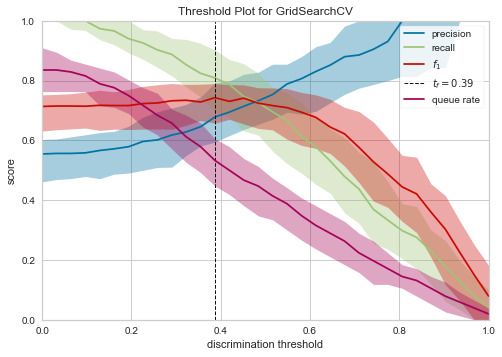

In [179]:
from yellowbrick.classifier import discrimination_threshold


visualizer = discrimination_threshold(
    rf_grid, x_teste14, y_pred14
)

## Gradient Boosting

In [159]:
#1
gb_dict = { 
    "max_depth":[3,5],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mse"],
    'random_state': [1967]
}

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

In [161]:
gb_grid = GridSearchCV(estimator=gb,       # parametro a ser utilizado. No caso, random forestt
                      param_grid=gb_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)  

### Treino para média móvel de 14 dias

In [162]:
#4
gb_grid.fit(x_treino14, y_treino14)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'max_depth': [3, 5], 'max_features': ['log2', 'sqrt'],
                         'random_state': [1967]},
             scoring='accuracy')

In [163]:
gb_grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 'log2',
 'random_state': 1967}

In [164]:
gb_grid.best_score_

0.7340347870246937

In [165]:
gb_grid.score(x_treino14, y_treino14)

0.932806324110672

In [166]:
y_pred14 = gb_grid.predict(x_teste14)

In [167]:
print(metrics.classification_report(y_teste14, y_pred14, target_names=['0','1']))
print("Acurácia de Previsão:", accuracy_score(y_teste14, y_pred14))

              precision    recall  f1-score   support

           0       0.72      0.80      0.75       372
           1       0.78      0.70      0.74       387

    accuracy                           0.75       759
   macro avg       0.75      0.75      0.75       759
weighted avg       0.75      0.75      0.75       759

Acurácia de Previsão: 0.7457180500658761


In [168]:
confusion_matrix(y_teste14, y_pred14)

array([[297,  75],
       [118, 269]], dtype=int64)

## Decision Tree

In [169]:
dt_dict = {
    'criterion' : ['gini','entropy'],
    'min_samples_leaf': [1,2,3,4,5],
    'random_state': [42]
       }

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dt = DecisionTreeClassifier(random_state=42)

In [172]:
dt_grid = GridSearchCV(estimator=dt,       # parametro a ser utilizado. No caso, random forestt
                      param_grid=dt_dict,  # nome do dicionario com parametros
                      scoring='accuracy',  # parametro de validação: acurácia
                      cv=10)  

### Treino para média móvel de 14 dias

In [173]:
dt_grid.fit(x_treino14, y_treino14)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'random_state': [42]},
             scoring='accuracy')

In [174]:
dt_grid.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'random_state': 42}

In [175]:
dt_grid.best_score_

0.7317812480162509

In [176]:
dt_grid.score(x_treino14, y_treino14)

1.0

In [177]:
y_pred14 = dt_grid.predict(x_teste14)

In [178]:
print(metrics.classification_report(y_teste14, y_pred14, target_names=['0','1']))
print("Acurácia de Previsão:", accuracy_score(y_teste14, y_pred14))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       372
           1       0.77      0.69      0.73       387

    accuracy                           0.74       759
   macro avg       0.74      0.74      0.74       759
weighted avg       0.74      0.74      0.74       759

Acurácia de Previsão: 0.7391304347826086
